In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Interpolation/InterpolatedDenMonth.csv')

In [3]:
df

,DATES,D REVENUE,U CR,D OE,D NOI,U CAPEX,U CWK,D FCF
0,2009-12-31,1884.372544,976.202014,475.249997,757.519678,207.477947,3600.000000,856.600959
1,2010-01-31,1884.566826,983.762225,485.004015,734.017979,207.303532,3638.472896,810.859727
2,2010-02-28,1884.761107,991.322435,494.758033,710.516281,207.129117,3676.945791,765.118495
3,2010-03-31,1884.955389,998.882646,504.512051,687.014582,206.954702,3715.418687,719.377263
4,2010-04-30,1880.767673,1006.377690,481.542613,511.922217,207.283705,3792.839197,732.414605
...,...,...,...,...,...,...,...,...
104,2018-08-31,1785.193900,972.274049,461.469501,414.377788,98.125058,2795.231076,733.164793
105,2018-09-30,1730.706270,953.165883,488.056175,424.307526,95.323030,2858.452805,729.764211
106,2018-10-31,1667.921494,856.900384,471.261535,434.874583,92.144220,2849.606546,737.713784
107,2018-11-30,1605.136718,760.634885,454.466895,445.441639,88.965411,2840.760287,745.663358


In [4]:
df["D FCF"].mean()

721.8102386623852

In [5]:
dataset = df.values

In [6]:
dataset

array([['2009-12-31', 1884.372544, 976.2020142, 475.24999739999987,
        757.519678, 207.4779469, 3600.0, 856.6009594000002],
       ['2010-01-31', 1884.5668256666668, 983.7622247333335, 485.0040154,
        734.0179793333333, 207.30353190000002, 3638.472895666667,
        810.8597272333334],
       ['2010-02-28', 1884.761107333333, 991.3224352666666,
        494.75803339999993, 710.5162806666667, 207.12911689999999,
        3676.945791333333, 765.1184950666667],
       ['2010-03-31', 1884.955389, 998.8826458, 504.5120514, 687.014582,
        206.9547019, 3715.418687, 719.3772629],
       ['2010-04-30', 1880.767673333333, 1006.3776901999997,
        481.5426128333333, 511.92221730000006, 207.28370463333331,
        3792.8391966666654, 732.4146046],
       ['2010-05-31', 1876.5799576666668, 1013.8727346000001,
        458.5731742666666, 336.8298526000001, 207.61270736666665,
        3870.2597063333333, 745.4519462999999],
       ['2010-06-30', 1872.392242, 1021.367779, 435.6037357, 1

In [7]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [9]:
X_scale

array([[0.21536771, 0.34358992, 0.28760773, 1.        , 0.14011453,
        0.70628215],
       [0.21549004, 0.35192007, 0.32225043, 0.9605532 , 0.13991371,
        0.72165108],
       [0.21561238, 0.36025022, 0.35689312, 0.92110641, 0.13971289,
        0.73702   ],
       [0.21573472, 0.36858036, 0.39153581, 0.88165961, 0.13951207,
        0.75238893],
       [0.21309775, 0.37683871, 0.30995679, 0.58777307, 0.13989088,
        0.78331641],
       [0.21046078, 0.38509706, 0.22837778, 0.29388654, 0.14026969,
        0.8142439 ],
       [0.2078238 , 0.3933554 , 0.14679876, 0.        , 0.1406485 ,
        0.84517139],
       [0.19576386, 0.38652631, 0.09786584, 0.0434695 , 0.14038687,
        0.85238924],
       [0.18370391, 0.37969722, 0.04893292, 0.086939  , 0.14012524,
        0.85960709],
       [0.17164397, 0.37286814, 0.        , 0.1304085 , 0.13986361,
        0.86682494],
       [0.19455526, 0.37922834, 0.05993416, 0.14266337, 0.14557165,
        0.90348124],
       [0.21746656, 0

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(87, 6) (11, 6) (11, 6) (87,) (11,) (11,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
model = Sequential([
    Dense(6, activation='softplus', input_shape=(6,)),
    Dense(64, activation='softplus'),
    Dense(64, activation='softplus'),
    Dense(64, activation='softplus'),
    Dense(64, activation='softplus'),
    Dense(64, activation='softplus'),
    Dense(64, activation='softplus'),
    Dense(1, activation='softplus'),
])

In [14]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size=2, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 87 samples, validate on 11 samples
Epoch 1/1500
87/87 [==============================] - 1s 6ms/step - loss: 307.8317 - val_loss: 70.0157
Epoch 2/1500
87/87 [==============================] - 0s 2ms/step - loss: 67.9056 - val_loss: 73.1259
Epoch 3/1500
87/87 [==============================] - 0s 2ms/step - loss: 67.8727 - val_loss: 102.8707
Epoch 4/1500
87/87 [==============================] - 0s 2ms/step - loss: 70.8696 - val_loss: 71.4381
Epoch 5/1500
87/87 [==============================] - 0s 2ms/step - loss: 70.6390 - val_loss: 64.0499
Epoch 6/1500
87/87 [==============================] - 0s 2ms/step - loss: 69.2557 - val_loss: 77.2375
Epoch 7/1500
87/87 [==============================] - 0s 2ms/step - loss: 68.9814 - val_loss: 82.4250
Epoch 8/1500
87/87 [==============================] - 0s 2ms/step - loss: 65.7351 - val_loss: 67.1853
Epoch 9/1500
87/87 [==============================] - 0s 2ms/step - loss: 68.0921 - val_loss: 68.8986
Epoch 10/1500
87/87 [===============

87/87 [==============================] - 0s 2ms/step - loss: 54.9551 - val_loss: 42.0999
Epoch 81/1500
87/87 [==============================] - 0s 2ms/step - loss: 55.7728 - val_loss: 124.5146
Epoch 82/1500
87/87 [==============================] - 0s 2ms/step - loss: 50.9040 - val_loss: 83.5593
Epoch 83/1500
87/87 [==============================] - 0s 2ms/step - loss: 49.2410 - val_loss: 42.6544
Epoch 84/1500
87/87 [==============================] - 0s 2ms/step - loss: 47.7167 - val_loss: 95.8759
Epoch 85/1500
87/87 [==============================] - 0s 2ms/step - loss: 56.3380 - val_loss: 50.2784
Epoch 86/1500
87/87 [==============================] - 0s 1ms/step - loss: 53.1777 - val_loss: 65.4648
Epoch 87/1500
87/87 [==============================] - 0s 2ms/step - loss: 50.6875 - val_loss: 93.4128
Epoch 88/1500
87/87 [==============================] - 0s 1ms/step - loss: 53.6956 - val_loss: 55.2745
Epoch 89/1500
87/87 [==============================] - 0s 1ms/step - loss: 52.3190 - v

87/87 [==============================] - 0s 2ms/step - loss: 45.7838 - val_loss: 62.7836
Epoch 160/1500
87/87 [==============================] - 0s 2ms/step - loss: 51.1278 - val_loss: 44.2859
Epoch 161/1500
87/87 [==============================] - 0s 2ms/step - loss: 45.2242 - val_loss: 82.6568
Epoch 162/1500
87/87 [==============================] - 0s 2ms/step - loss: 47.9040 - val_loss: 47.9128
Epoch 163/1500
87/87 [==============================] - 0s 2ms/step - loss: 51.1536 - val_loss: 55.6560
Epoch 164/1500
87/87 [==============================] - 0s 2ms/step - loss: 51.1525 - val_loss: 62.9760
Epoch 165/1500
87/87 [==============================] - 0s 2ms/step - loss: 46.3092 - val_loss: 59.9767
Epoch 166/1500
87/87 [==============================] - 0s 2ms/step - loss: 47.9589 - val_loss: 48.6084
Epoch 167/1500
87/87 [==============================] - 0s 2ms/step - loss: 48.9479 - val_loss: 74.9102
Epoch 168/1500
87/87 [==============================] - 0s 1ms/step - loss: 51.

Epoch 238/1500
87/87 [==============================] - 0s 2ms/step - loss: 47.9143 - val_loss: 52.5626
Epoch 239/1500
87/87 [==============================] - 0s 2ms/step - loss: 48.9723 - val_loss: 68.2157
Epoch 240/1500
87/87 [==============================] - 0s 2ms/step - loss: 45.3067 - val_loss: 60.9084
Epoch 241/1500
87/87 [==============================] - 0s 2ms/step - loss: 48.0985 - val_loss: 73.7482
Epoch 242/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.7827 - val_loss: 82.1898
Epoch 243/1500
87/87 [==============================] - 0s 1ms/step - loss: 44.3363 - val_loss: 95.3103
Epoch 244/1500
87/87 [==============================] - 0s 2ms/step - loss: 47.8201 - val_loss: 53.3529
Epoch 245/1500
87/87 [==============================] - 0s 2ms/step - loss: 43.7843 - val_loss: 71.4943
Epoch 246/1500
87/87 [==============================] - 0s 1ms/step - loss: 48.4989 - val_loss: 76.1944
Epoch 247/1500
87/87 [==============================] - 0s 1ms/s

87/87 [==============================] - 0s 2ms/step - loss: 43.8166 - val_loss: 49.0231
Epoch 317/1500
87/87 [==============================] - 0s 1ms/step - loss: 46.8714 - val_loss: 54.3262
Epoch 318/1500
87/87 [==============================] - 0s 1ms/step - loss: 42.8905 - val_loss: 48.5974
Epoch 319/1500
87/87 [==============================] - 0s 2ms/step - loss: 46.8194 - val_loss: 58.7344
Epoch 320/1500
87/87 [==============================] - 0s 2ms/step - loss: 44.4854 - val_loss: 77.3908
Epoch 321/1500
87/87 [==============================] - 0s 2ms/step - loss: 42.8503 - val_loss: 54.2392
Epoch 322/1500
87/87 [==============================] - 0s 2ms/step - loss: 43.5555 - val_loss: 65.8560
Epoch 323/1500
87/87 [==============================] - 0s 2ms/step - loss: 44.5459 - val_loss: 49.9819
Epoch 324/1500
87/87 [==============================] - 0s 2ms/step - loss: 45.4216 - val_loss: 113.3512
Epoch 325/1500
87/87 [==============================] - 0s 1ms/step - loss: 45

Epoch 395/1500
87/87 [==============================] - 0s 1ms/step - loss: 45.4784 - val_loss: 57.0430
Epoch 396/1500
87/87 [==============================] - 0s 1ms/step - loss: 41.9150 - val_loss: 72.5879
Epoch 397/1500
87/87 [==============================] - 0s 2ms/step - loss: 44.7381 - val_loss: 71.6564
Epoch 398/1500
87/87 [==============================] - 0s 1ms/step - loss: 41.9124 - val_loss: 65.2861
Epoch 399/1500
87/87 [==============================] - 0s 1ms/step - loss: 42.6435 - val_loss: 74.7660
Epoch 400/1500
87/87 [==============================] - 0s 1ms/step - loss: 37.5832 - val_loss: 65.3633
Epoch 401/1500
87/87 [==============================] - 0s 1ms/step - loss: 42.9978 - val_loss: 55.0147
Epoch 402/1500
87/87 [==============================] - 0s 1ms/step - loss: 44.9139 - val_loss: 54.4798
Epoch 403/1500
87/87 [==============================] - 0s 1ms/step - loss: 44.7683 - val_loss: 67.7947
Epoch 404/1500
87/87 [==============================] - 0s 2ms/s

Epoch 474/1500
87/87 [==============================] - 0s 2ms/step - loss: 42.2996 - val_loss: 52.2140
Epoch 475/1500
87/87 [==============================] - 0s 2ms/step - loss: 42.6740 - val_loss: 51.4940
Epoch 476/1500
87/87 [==============================] - 0s 2ms/step - loss: 42.5986 - val_loss: 68.3337
Epoch 477/1500
87/87 [==============================] - 0s 1ms/step - loss: 43.9482 - val_loss: 49.4941
Epoch 478/1500
87/87 [==============================] - 0s 1ms/step - loss: 41.1275 - val_loss: 53.7469
Epoch 479/1500
87/87 [==============================] - 0s 1ms/step - loss: 42.6310 - val_loss: 55.2941
Epoch 480/1500
87/87 [==============================] - 0s 2ms/step - loss: 44.5444 - val_loss: 62.9204
Epoch 481/1500
87/87 [==============================] - 0s 1ms/step - loss: 41.9591 - val_loss: 58.7173
Epoch 482/1500
87/87 [==============================] - 0s 1ms/step - loss: 43.2000 - val_loss: 60.0657
Epoch 483/1500
87/87 [==============================] - 0s 1ms/s

Epoch 553/1500
87/87 [==============================] - 0s 2ms/step - loss: 38.1230 - val_loss: 64.4281
Epoch 554/1500
87/87 [==============================] - 0s 2ms/step - loss: 38.7682 - val_loss: 78.4486
Epoch 555/1500
87/87 [==============================] - 0s 2ms/step - loss: 42.1128 - val_loss: 57.6249
Epoch 556/1500
87/87 [==============================] - 0s 1ms/step - loss: 41.0988 - val_loss: 53.5303
Epoch 557/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.8785 - val_loss: 54.0854
Epoch 558/1500
87/87 [==============================] - 0s 1ms/step - loss: 40.9856 - val_loss: 88.3285
Epoch 559/1500
87/87 [==============================] - 0s 1ms/step - loss: 43.5870 - val_loss: 49.9950
Epoch 560/1500
87/87 [==============================] - 0s 2ms/step - loss: 40.4697 - val_loss: 54.3067
Epoch 561/1500
87/87 [==============================] - 0s 1ms/step - loss: 42.0353 - val_loss: 68.0548
Epoch 562/1500
87/87 [==============================] - 0s 1ms/s

Epoch 632/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.8809 - val_loss: 56.1031
Epoch 633/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.6255 - val_loss: 54.3603
Epoch 634/1500
87/87 [==============================] - 0s 2ms/step - loss: 41.8800 - val_loss: 55.9710
Epoch 635/1500
87/87 [==============================] - 0s 2ms/step - loss: 40.5339 - val_loss: 51.8604
Epoch 636/1500
87/87 [==============================] - 0s 2ms/step - loss: 40.2099 - val_loss: 58.4000
Epoch 637/1500
87/87 [==============================] - 0s 2ms/step - loss: 40.1610 - val_loss: 59.9812
Epoch 638/1500
87/87 [==============================] - 0s 2ms/step - loss: 40.1606 - val_loss: 48.8783
Epoch 639/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.6281 - val_loss: 63.3287
Epoch 640/1500
87/87 [==============================] - 0s 2ms/step - loss: 43.5608 - val_loss: 53.4294
Epoch 641/1500
87/87 [==============================] - 0s 2ms/s

Epoch 711/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.6471 - val_loss: 55.1423
Epoch 712/1500
87/87 [==============================] - 0s 2ms/step - loss: 38.9325 - val_loss: 47.8579
Epoch 713/1500
87/87 [==============================] - 0s 2ms/step - loss: 40.0213 - val_loss: 52.2058
Epoch 714/1500
87/87 [==============================] - 0s 2ms/step - loss: 36.8896 - val_loss: 51.1995
Epoch 715/1500
87/87 [==============================] - 0s 2ms/step - loss: 40.8193 - val_loss: 49.3814
Epoch 716/1500
87/87 [==============================] - 0s 2ms/step - loss: 41.4926 - val_loss: 51.4443
Epoch 717/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.7384 - val_loss: 71.9278
Epoch 718/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.6057 - val_loss: 56.6683
Epoch 719/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.0799 - val_loss: 53.2050
Epoch 720/1500
87/87 [==============================] - 0s 2ms/s

Epoch 790/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.6205 - val_loss: 48.7953
Epoch 791/1500
87/87 [==============================] - 0s 2ms/step - loss: 38.4011 - val_loss: 50.4268
Epoch 792/1500
87/87 [==============================] - 0s 1ms/step - loss: 35.2503 - val_loss: 78.0716
Epoch 793/1500
87/87 [==============================] - 0s 1ms/step - loss: 34.6113 - val_loss: 58.1153
Epoch 794/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.3777 - val_loss: 55.2723
Epoch 795/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.9054 - val_loss: 58.1975
Epoch 796/1500
87/87 [==============================] - 0s 2ms/step - loss: 38.6062 - val_loss: 64.0240
Epoch 797/1500
87/87 [==============================] - 0s 2ms/step - loss: 39.2821 - val_loss: 66.4343
Epoch 798/1500
87/87 [==============================] - 0s 2ms/step - loss: 36.0867 - val_loss: 72.1852
Epoch 799/1500
87/87 [==============================] - 0s 2ms/s

Epoch 869/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.1198 - val_loss: 63.8556
Epoch 870/1500
87/87 [==============================] - 0s 1ms/step - loss: 35.3680 - val_loss: 59.3452
Epoch 871/1500
87/87 [==============================] - 0s 1ms/step - loss: 38.7961 - val_loss: 49.3550
Epoch 872/1500
87/87 [==============================] - 0s 1ms/step - loss: 35.5563 - val_loss: 60.9102
Epoch 873/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.4971 - val_loss: 48.9243
Epoch 874/1500
87/87 [==============================] - 0s 2ms/step - loss: 36.8301 - val_loss: 47.4949
Epoch 875/1500
87/87 [==============================] - 0s 2ms/step - loss: 34.5115 - val_loss: 57.9981
Epoch 876/1500
87/87 [==============================] - 0s 2ms/step - loss: 35.2005 - val_loss: 50.9908
Epoch 877/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.8852 - val_loss: 49.9012
Epoch 878/1500
87/87 [==============================] - 0s 2ms/s

Epoch 948/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.0058 - val_loss: 55.6272
Epoch 949/1500
87/87 [==============================] - 0s 2ms/step - loss: 37.3171 - val_loss: 62.1288
Epoch 950/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.1754 - val_loss: 47.4616
Epoch 951/1500
87/87 [==============================] - 0s 2ms/step - loss: 35.4620 - val_loss: 47.2939
Epoch 952/1500
87/87 [==============================] - 0s 1ms/step - loss: 35.4453 - val_loss: 56.3087
Epoch 953/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.7841 - val_loss: 50.1806
Epoch 954/1500
87/87 [==============================] - 0s 2ms/step - loss: 36.0097 - val_loss: 48.3063
Epoch 955/1500
87/87 [==============================] - 0s 1ms/step - loss: 34.6453 - val_loss: 52.8568
Epoch 956/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.9210 - val_loss: 69.8866
Epoch 957/1500
87/87 [==============================] - 0s 2ms/s

87/87 [==============================] - 0s 2ms/step - loss: 31.2052 - val_loss: 59.6561
Epoch 1027/1500
87/87 [==============================] - 0s 1ms/step - loss: 34.3986 - val_loss: 46.4504
Epoch 1028/1500
87/87 [==============================] - 0s 1ms/step - loss: 30.3699 - val_loss: 49.2954
Epoch 1029/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.0493 - val_loss: 55.2152
Epoch 1030/1500
87/87 [==============================] - 0s 1ms/step - loss: 37.4457 - val_loss: 61.3391
Epoch 1031/1500
87/87 [==============================] - 0s 1ms/step - loss: 33.2824 - val_loss: 44.9266
Epoch 1032/1500
87/87 [==============================] - 0s 1ms/step - loss: 31.6051 - val_loss: 50.4392
Epoch 1033/1500
87/87 [==============================] - 0s 1ms/step - loss: 34.2624 - val_loss: 46.3839
Epoch 1034/1500
87/87 [==============================] - 0s 1ms/step - loss: 33.2371 - val_loss: 56.2000
Epoch 1035/1500
87/87 [==============================] - 0s 1ms/step - 

87/87 [==============================] - 0s 2ms/step - loss: 32.3359 - val_loss: 51.5931
Epoch 1105/1500
87/87 [==============================] - 0s 1ms/step - loss: 30.6871 - val_loss: 45.1101
Epoch 1106/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.9870 - val_loss: 48.9923
Epoch 1107/1500
87/87 [==============================] - 0s 1ms/step - loss: 31.8936 - val_loss: 46.8564
Epoch 1108/1500
87/87 [==============================] - 0s 3ms/step - loss: 31.6390 - val_loss: 56.4742
Epoch 1109/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.0805 - val_loss: 39.6295
Epoch 1110/1500
87/87 [==============================] - 0s 2ms/step - loss: 31.8186 - val_loss: 45.2738
Epoch 1111/1500
87/87 [==============================] - 0s 1ms/step - loss: 34.5397 - val_loss: 42.1417
Epoch 1112/1500
87/87 [==============================] - 0s 2ms/step - loss: 31.9861 - val_loss: 50.6030
Epoch 1113/1500
87/87 [==============================] - 0s 2ms/step - 

87/87 [==============================] - 0s 2ms/step - loss: 30.5663 - val_loss: 47.0034
Epoch 1183/1500
87/87 [==============================] - 0s 1ms/step - loss: 29.4746 - val_loss: 62.8145
Epoch 1184/1500
87/87 [==============================] - 0s 2ms/step - loss: 33.9296 - val_loss: 43.9647
Epoch 1185/1500
87/87 [==============================] - 0s 2ms/step - loss: 30.0373 - val_loss: 44.1608
Epoch 1186/1500
87/87 [==============================] - 0s 2ms/step - loss: 28.3417 - val_loss: 37.1560
Epoch 1187/1500
87/87 [==============================] - 0s 2ms/step - loss: 29.5556 - val_loss: 59.1764
Epoch 1188/1500
87/87 [==============================] - 0s 1ms/step - loss: 30.1717 - val_loss: 46.7035
Epoch 1189/1500
87/87 [==============================] - 0s 1ms/step - loss: 30.2611 - val_loss: 52.3899
Epoch 1190/1500
87/87 [==============================] - 0s 1ms/step - loss: 30.9255 - val_loss: 45.9190
Epoch 1191/1500
87/87 [==============================] - 0s 2ms/step - 

87/87 [==============================] - 0s 2ms/step - loss: 30.0936 - val_loss: 39.5058
Epoch 1261/1500
87/87 [==============================] - 0s 2ms/step - loss: 31.3793 - val_loss: 64.3474
Epoch 1262/1500
87/87 [==============================] - 0s 2ms/step - loss: 30.2707 - val_loss: 57.0929
Epoch 1263/1500
87/87 [==============================] - 0s 1ms/step - loss: 28.8859 - val_loss: 36.6110
Epoch 1264/1500
87/87 [==============================] - 0s 2ms/step - loss: 30.1830 - val_loss: 40.6319
Epoch 1265/1500
87/87 [==============================] - 0s 2ms/step - loss: 29.9498 - val_loss: 70.6529
Epoch 1266/1500
87/87 [==============================] - 0s 1ms/step - loss: 32.9059 - val_loss: 35.8283
Epoch 1267/1500
87/87 [==============================] - 0s 2ms/step - loss: 29.2484 - val_loss: 41.8862
Epoch 1268/1500
87/87 [==============================] - 0s 2ms/step - loss: 31.1211 - val_loss: 61.2001
Epoch 1269/1500
87/87 [==============================] - 0s 2ms/step - 

87/87 [==============================] - 0s 2ms/step - loss: 29.9339 - val_loss: 37.9980
Epoch 1339/1500
87/87 [==============================] - 0s 2ms/step - loss: 30.0823 - val_loss: 34.4607
Epoch 1340/1500
87/87 [==============================] - 0s 1ms/step - loss: 28.9135 - val_loss: 33.8767
Epoch 1341/1500
87/87 [==============================] - 0s 1ms/step - loss: 28.8205 - val_loss: 33.5130
Epoch 1342/1500
87/87 [==============================] - 0s 1ms/step - loss: 28.9484 - val_loss: 39.6892
Epoch 1343/1500
87/87 [==============================] - 0s 1ms/step - loss: 29.2810 - val_loss: 47.3900
Epoch 1344/1500
87/87 [==============================] - 0s 1ms/step - loss: 28.5640 - val_loss: 42.8955
Epoch 1345/1500
87/87 [==============================] - 0s 2ms/step - loss: 30.6641 - val_loss: 48.7705
Epoch 1346/1500
87/87 [==============================] - 0s 1ms/step - loss: 29.9664 - val_loss: 48.3322
Epoch 1347/1500
87/87 [==============================] - 0s 2ms/step - 

87/87 [==============================] - 0s 2ms/step - loss: 28.1310 - val_loss: 38.1441
Epoch 1417/1500
87/87 [==============================] - 0s 2ms/step - loss: 26.4714 - val_loss: 34.5124
Epoch 1418/1500
87/87 [==============================] - 0s 2ms/step - loss: 26.6658 - val_loss: 50.9485
Epoch 1419/1500
87/87 [==============================] - 0s 2ms/step - loss: 26.4956 - val_loss: 49.4830
Epoch 1420/1500
87/87 [==============================] - 0s 2ms/step - loss: 28.0189 - val_loss: 64.0605
Epoch 1421/1500
87/87 [==============================] - 0s 2ms/step - loss: 27.9284 - val_loss: 38.9401
Epoch 1422/1500
87/87 [==============================] - 0s 2ms/step - loss: 26.4395 - val_loss: 41.0889
Epoch 1423/1500
87/87 [==============================] - 0s 2ms/step - loss: 27.5246 - val_loss: 38.0497
Epoch 1424/1500
87/87 [==============================] - 0s 2ms/step - loss: 27.4534 - val_loss: 56.7021
Epoch 1425/1500
87/87 [==============================] - ETA: 0s - loss

Epoch 1494/1500
87/87 [==============================] - 0s 2ms/step - loss: 29.4675 - val_loss: 46.6176
Epoch 1495/1500
87/87 [==============================] - 0s 2ms/step - loss: 28.0089 - val_loss: 41.2250
Epoch 1496/1500
87/87 [==============================] - 0s 2ms/step - loss: 29.8513 - val_loss: 43.6706
Epoch 1497/1500
87/87 [==============================] - 0s 2ms/step - loss: 27.0020 - val_loss: 39.5208
Epoch 1498/1500
87/87 [==============================] - 0s 2ms/step - loss: 27.1679 - val_loss: 33.1604
Epoch 1499/1500
87/87 [==============================] - 0s 2ms/step - loss: 26.6962 - val_loss: 33.0591
Epoch 1500/1500
87/87 [==============================] - 0s 2ms/step - loss: 25.7447 - val_loss: 33.0554


In [16]:
import matplotlib.pyplot as plt

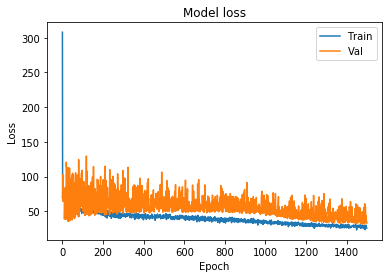

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("modelden.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelden.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [20]:
from sklearn.metrics import r2_score
r2_score(Y.tolist(), array.tolist())

0.682673441392893